## Create Unique Journal count

In [101]:
import pandas as pd
import ast
import math
import matplotlib.pyplot as plt

In [104]:
chunk_size = 10000
chunks = pd.read_csv('./results_completed.csv', usecols=['title','year', 'venue',
                                                         'journal', 'mag_field_of_study', 
                                                         'data_use','outbound_citations', 
                                                         'inbound_citations', 'countries',]
                                                         , chunksize=chunk_size)

# title,abstract,year,doi,venue,journal,mag_field_of_study,
# ATF,BVT,CAF,HMD,IOT,MSR,PYF,SPM,SXM,UMI,WSM,
# data_use,group_name,outbound_citations,inbound_citations,places,countries



In [106]:
journal_counts = {}
def create_journal_count(chunk, column_name):
    """
    Args:
        chunk (<class 'pandas.core.frame.DataFrame'>): 
                            pandas data frame chunk
        column_name (string): specifies the column name to be processed inside the 
                            chunk. 
    """
    global journal_counts
    for journal in chunk[column_name]:
        if journal in journal_counts:
            journal_counts[journal] += 1
        else:
            journal_counts[journal]=1

#### process the chunks to get journal count

In [89]:
for chunk in chunks:
    create_journal_count(chunk,'journal')

In [97]:
sorted_journals = sorted(journal_counts.items(), key=lambda x: x[1], reverse=True)

total_count = sum([count for _, count in sorted_journals])

cumulative_count = 0
top_journals = []
for journal, count in sorted_journals:
    cumulative_count += count
    top_journals.append((journal, count))
    # Stop when 80% of the total count
    if cumulative_count / total_count >= 0.2:
        break  

top_journal_names = [journal for journal, count in top_journals if not (isinstance(journal, float) and math.isnan(journal))]
top_journal_count = [count for journal, count in top_journals][1:]


/var/folders/3c/vxqxzgl947b763q5x0kmq9h00000gn/T/ipykernel_6450/2236574196.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


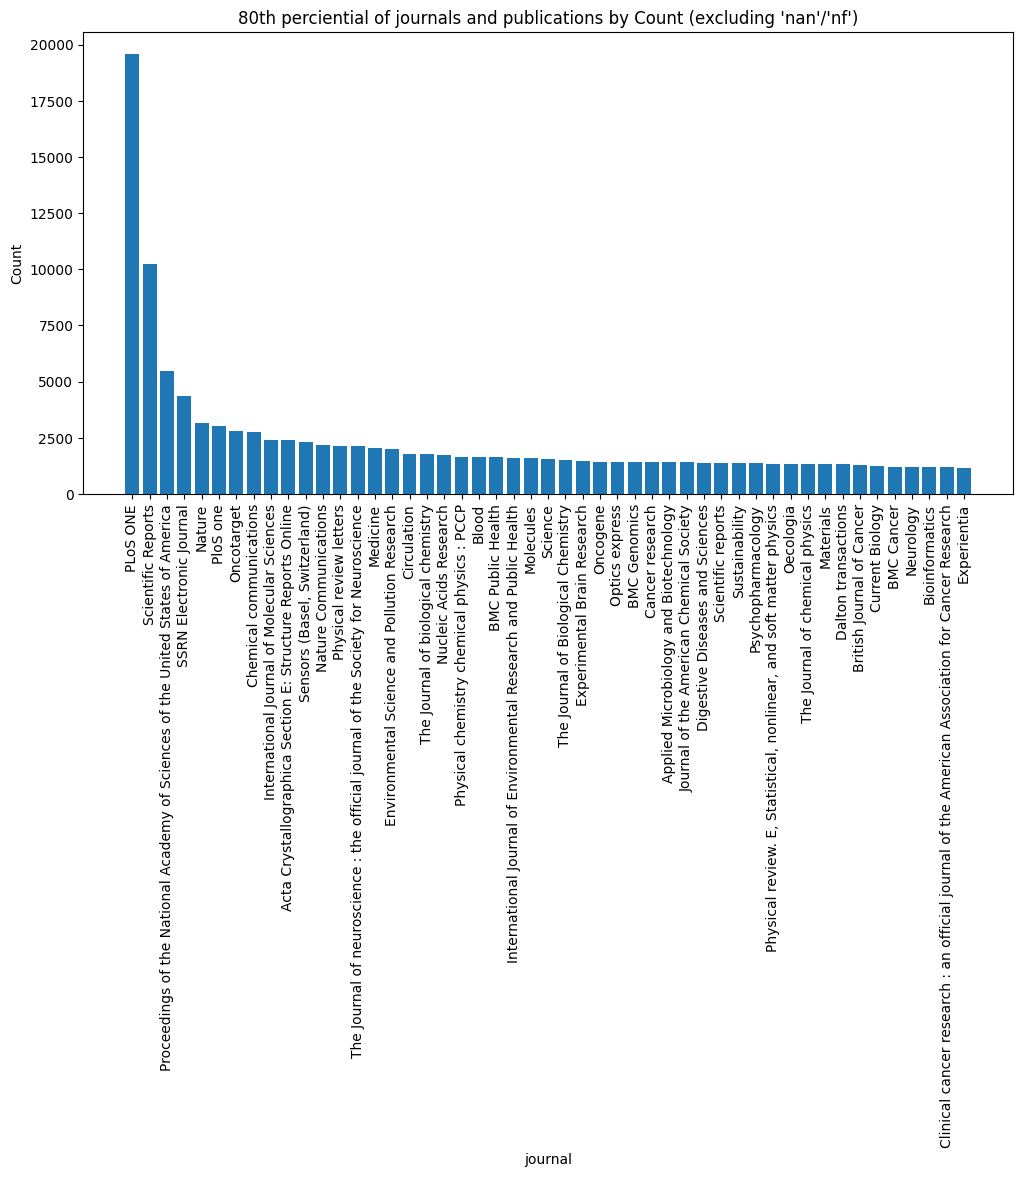

In [107]:

plt.figure(figsize=(12, 6))
plt.bar(top_journal_names, top_journal_count)
plt.title("80th perciential of journals and publications by Count (excluding 'nan'/'nf')")
plt.xlabel("journal")
plt.ylabel("Count")
# Rotate x labels for better readability
plt.xticks(rotation=90)  
plt.tight_layout()
plt.savefig('top80journals.pdf', bbox_inches='tight')  
plt.show()

Here are some general statistical questions that are often relevant in various contexts, from data analysis to scientific research:

1. **Descriptive Statistics:**
   - What is the mean, median, and mode of the dataset?
   - What is the range, variance, and standard deviation?
   - Are there any outliers, and how do they impact the dataset?
   - How is the data distributed (normal, skewed, etc.)?

2. **Probability:**
   - What is the probability of a specific event occurring?
   - How do different events relate in terms of probability (independent, mutually exclusive, etc.)?
   - What is the conditional probability of one event given another?


3. **Hypothesis Testing:**
    - What is the p-value, and how does it influence the results?

4. **Time Series and Forecasting:**
   - Are there any trends, seasonal patterns, or cyclic behaviors in the data?
   - What models can be used to forecast future data points?
   - How accurate are the forecasts, and what is the mean squared error?


In [ ]:
#  median and average by year 
#  does it have any significace. 
#  which countries showed the most growth over the years. 
#  create a heat map to show each countries and the journal and their count. 